## Importing libraries and setting up API

In [298]:
#Import our libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [299]:
#Load environment
load_dotenv()

True

In [300]:
# Set Alpaca API key and secret
ALPACA_API_KEY= 'PK35UJNKV09UTBFL473Y'
ALPACA_SECRET_KEY='9d9vKqDmXpce6f5b832O9Y3c0T75ZPDx9c0xoxVG'

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Pulling necessary data from API 

In [302]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
#Set tickers for what we want
tickers = ["SOL", "ATOM", "LITE"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [303]:
# Get 5 years' worth of historical data for ethereum, solana, cosmos, and litecoin
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_coin_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
#Return data and drop nulls
df_coin_data.dropna().head()

ATOM                                  LITE  \
                             open    high     low close   volume   open   
time                                                                      
2017-01-12 00:00:00-05:00  6.0300  6.1900  5.9564  6.04  20726.0  37.25   
2017-01-13 00:00:00-05:00  6.0000  6.2200  5.8600  5.93   8266.0  36.15   
2017-01-17 00:00:00-05:00  5.9400  6.0000  5.5100  5.87  19310.0  36.05   
2017-01-18 00:00:00-05:00  6.0407  6.0407  5.5000  6.04  84759.0  35.05   
2017-01-19 00:00:00-05:00  5.9900  6.0399  5.9400  6.03   4049.0  35.05   

                                                              SOL         \
                            high     low  close     volume   open   high   
time                                                                       
2017-01-12 00:00:00-05:00  37.25  35.125  36.05  1128838.0  3.424  3.425   
2017-01-13 00:00:00-05:00  37.00  35.625  36.35   526091.0  3.329  3.550   
2017-01-17 00:00:00-05:00  36.05  34.775  35.00   592155.0  3.480  3.500   
2017-01-18 00:00:00-05:00  35.25  34.200  34.70   785541.0  3.405  3.438   
2017-01-19 00:00:00-05:00  36.55  34.900  35.05  1185368.0  3.256  3.419   

                                                   
                             low  close    volume  
time                                               
2017-01-12 00:00:00-05:00  3.351  3.375   35056.0  
2017-01-13 00:00:00-05:00  3.329  3.513  111105.0  
2017-01-17 00:00:00-05:00  3.400  3.415  102694.0  
2017-01-18 00:00:00-05:00  3.253  3.300   71159.0  
2017-01-19 00:00:00-05:00  3.175  3.254   78376.0

In [224]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
#Set tickers for what we want
tickers = ["ETH"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [226]:
# Get 5 years' worth of historical data for ethereum
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ETH_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
#Return data and drop nulls
df_ETH_data.dropna().head()

ETH                                
                            open    high      low  close  volume
time                                                            
2017-01-12 00:00:00-05:00  31.00  31.300  30.3750  31.15  294508
2017-01-13 00:00:00-05:00  31.20  31.850  31.2000  31.70  191924
2017-01-17 00:00:00-05:00  31.50  32.350  31.3500  32.00  195891
2017-01-18 00:00:00-05:00  31.95  32.170  31.6917  32.00  226955
2017-01-19 00:00:00-05:00  32.00  32.275  31.7500  32.10  368894

## Running Monte Carlo Simulation for 5 years on Ethereum

In [258]:
# Configuring a Monte Carlo simulation to forecast 5 years of Ethereum
MC_ETH_sim5 = MCSimulation(
    portfolio_data = df_ETH_data,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 364 * 5)

In [259]:
# Outputting the data
MC_ETH_sim5.portfolio_data.dropna().tail()

ETH                                          
                            open   high    low  close  volume daily_return
time                                                                      
2020-12-24 00:00:00-05:00  20.07  20.19  19.87  20.09  116301    -0.001491
2020-12-28 00:00:00-05:00  20.28  20.66  20.08  20.25  191446     0.007964
2020-12-29 00:00:00-05:00  20.17  20.17  19.67  20.02  199860    -0.011358
2020-12-30 00:00:00-05:00  20.15  20.40  20.03  20.26  123707     0.011988
2020-12-31 00:00:00-05:00  20.32  20.36  20.09  20.21   91542    -0.002468

In [260]:
# Running a Monte Carlo simulation
MC_ETH_sim5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980106,0.983881,1.038328,1.006666,0.982815,1.014009,1.035354,1.023089,0.993776,0.993647,...,1.022672,1.005779,0.993680,1.007616,1.011169,1.003723,0.992401,0.996340,0.977119,1.009341
2,1.005014,1.057338,1.047712,1.050512,0.979784,1.000754,1.018471,0.986814,0.983523,1.020148,...,1.015274,1.036307,0.958849,0.949315,0.999060,1.011567,0.957665,1.030797,0.959848,0.983244
3,0.935778,1.000949,1.048296,1.061345,0.979590,0.977230,1.038972,0.924548,1.015662,1.059753,...,1.019659,1.066196,0.993852,1.008005,0.991564,0.987301,0.999885,1.028672,0.964445,0.964526
4,0.873688,1.004540,1.020957,1.043228,1.021331,0.956615,1.044399,0.936620,0.988693,1.079045,...,1.018563,1.076925,1.042412,0.996556,0.981307,1.026329,1.027547,1.075036,0.973591,0.970135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0.191886,0.255081,3.090708,2.747346,1.298445,1.149193,0.139226,0.068661,0.209611,0.338411,...,0.182896,0.462699,0.341022,0.089085,1.268288,1.449693,0.575401,1.501662,0.409259,0.681861
1817,0.195025,0.259383,3.066075,2.847195,1.322429,1.155698,0.142305,0.069616,0.209812,0.329469,...,0.183529,0.454971,0.350372,0.089247,1.315089,1.450708,0.578663,1.528835,0.419305,0.679124
1818,0.196291,0.256596,3.019803,2.758332,1.345870,1.139432,0.144694,0.069156,0.207151,0.336091,...,0.187757,0.439094,0.342911,0.091195,1.250784,1.439114,0.598020,1.513023,0.422506,0.659057
1819,0.198829,0.255909,3.010560,2.663834,1.274649,1.161387,0.137063,0.067367,0.209081,0.346554,...,0.184760,0.429436,0.341219,0.092905,1.266000,1.356480,0.598768,1.538410,0.409001,0.693405


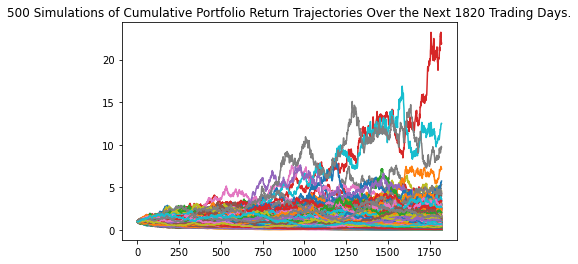

In [261]:
# Plot simulation outcomes
line_plot_ETH_5 = MC_ETH_sim5.plot_simulation()

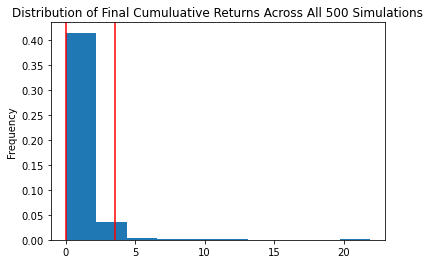

In [262]:
# Plot probability distribution and confidence intervals
dist_plot_ETH_5 = MC_ETH_sim5.plot_distribution()

In [263]:
# Get the summary statistics from the Monte Carlo simulation results for 5 years
ETH_table_5 = MC_ETH_sim5.summarize_cumulative_return()

# Print summary statistics
ETH_table_5

count           500.000000
mean              0.850580
std               1.468424
min               0.016268
25%               0.226658
50%               0.434662
75%               0.941503
max              21.908931
95% CI Lower      0.051773
95% CI Upper      3.534156
Name: 1820, dtype: float64

## Running Monte Carlo Simulation for 10 years on Ethereum

In [264]:
# Configuring a Monte Carlo simulation to forecast 10 years of Ethereum
MC_ETH_sim10 = MCSimulation(
    portfolio_data = df_ETH_data,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 364 * 10)

In [273]:
# Outputting the data
MC_ETH_sim10.portfolio_data.dropna().head()

ETH                                            
                            open    high      low close  volume daily_return
time                                                                        
2017-01-13 00:00:00-05:00  31.20  31.850  31.2000  31.7  191924     0.017657
2017-01-17 00:00:00-05:00  31.50  32.350  31.3500  32.0  195891     0.009464
2017-01-18 00:00:00-05:00  31.95  32.170  31.6917  32.0  226955     0.000000
2017-01-19 00:00:00-05:00  32.00  32.275  31.7500  32.1  368894     0.003125
2017-01-20 00:00:00-05:00  32.15  32.600  32.0500  32.3  233807     0.006231

In [266]:
# Running a Monte Carlo simulation
MC_ETH_sim10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989184,1.005042,0.989861,1.014746,0.993361,1.021803,1.011889,0.980884,1.027977,0.962736,...,1.050719,1.007353,0.976311,1.021955,0.956715,1.001603,1.018305,0.982690,0.998305,0.936847
2,1.007681,0.982213,1.003818,0.978811,1.012663,1.052826,1.019478,0.969974,1.056515,0.977919,...,1.008585,1.001554,0.924381,1.036723,0.964212,1.022346,1.027508,0.994313,0.985469,0.949156
3,1.057457,0.968294,0.947315,0.962869,0.974760,1.049343,0.978279,0.939356,1.050251,1.017058,...,0.971314,0.951991,0.941817,1.044621,0.957181,1.048972,1.025638,0.986545,0.976568,0.970696
4,1.061832,0.912671,0.937349,0.930350,1.004753,1.064920,0.996836,0.955303,1.083589,1.023647,...,0.951839,0.976379,0.932536,1.017922,0.948635,1.086786,1.049522,1.006437,0.958330,0.929735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2.261926,0.201916,0.688564,3.138446,0.002226,0.184410,0.054074,0.561238,0.425154,0.736303,...,2.265440,0.156431,0.403534,0.130525,0.124977,0.343852,0.174253,1.429768,0.242816,0.092202
3637,2.248850,0.208674,0.684195,3.131382,0.002249,0.180858,0.053293,0.573246,0.431365,0.733112,...,2.392138,0.151466,0.405643,0.129101,0.125249,0.341875,0.166537,1.431985,0.233638,0.093287
3638,2.238493,0.210474,0.660049,2.924117,0.002235,0.183944,0.054908,0.583971,0.432655,0.729245,...,2.417933,0.150767,0.407245,0.132002,0.130515,0.337263,0.167962,1.442432,0.237112,0.092396
3639,2.210110,0.218606,0.654417,3.014768,0.002272,0.189258,0.055044,0.578681,0.417974,0.748360,...,2.391990,0.151180,0.406279,0.133062,0.134716,0.331968,0.163537,1.497841,0.232784,0.092703


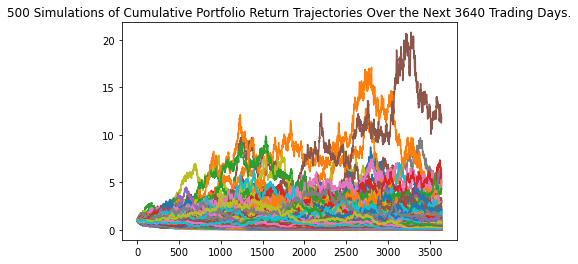

In [275]:
# Plot simulation outcomes
line_plot_ETH_10 = MC_ETH_sim10.plot_simulation()

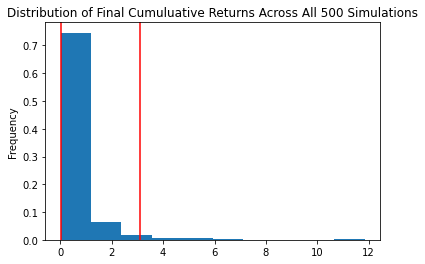

In [276]:
# Plot probability distribution and confidence intervals
dist_plot_ETH_10 = MC_ETH_sim10.plot_distribution()

In [277]:
# Get the summary statistics from the Monte Carlo simulation results for 10 years
ETH_table_10 = MC_ETH_sim10.summarize_cumulative_return()

# Print summary statistics
ETH_table_10

count           500.000000
mean              0.541152
std               1.006081
min               0.002341
25%               0.080450
50%               0.205974
75%               0.544885
max              11.851693
95% CI Lower      0.011421
95% CI Upper      3.089962
Name: 3640, dtype: float64

## Running Monte Carlo Simulation for 15 years on Ethereum

In [270]:
# Configuring a Monte Carlo simulation to forecast 15 years of Ethereum
MC_ETH_sim15 = MCSimulation(
    portfolio_data = df_ETH_data,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 364 * 15)

In [274]:
# Outputting the data
MC_ETH_sim15.portfolio_data.dropna().head()

ETH                                            
                            open    high      low close  volume daily_return
time                                                                        
2017-01-13 00:00:00-05:00  31.20  31.850  31.2000  31.7  191924     0.017657
2017-01-17 00:00:00-05:00  31.50  32.350  31.3500  32.0  195891     0.009464
2017-01-18 00:00:00-05:00  31.95  32.170  31.6917  32.0  226955     0.000000
2017-01-19 00:00:00-05:00  32.00  32.275  31.7500  32.1  368894     0.003125
2017-01-20 00:00:00-05:00  32.15  32.600  32.0500  32.3  233807     0.006231

In [272]:
# Running a Monte Carlo simulation
MC_ETH_sim15.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.055347,1.008060,1.035422,0.996529,1.019571,0.984637,1.024510,1.054050,0.997337,1.005468,...,1.037641,1.006732,0.988992,0.967865,0.982750,0.995471,0.995215,0.986099,0.987834,0.999840
2,0.999527,0.996864,1.017464,1.010217,0.956990,0.979722,1.013078,1.065770,0.987021,0.939581,...,1.008296,0.995991,0.990292,0.971804,0.973088,0.994577,0.971433,0.956049,0.956932,0.969464
3,1.023494,1.002895,1.034876,1.008382,0.940758,1.011445,0.975465,1.049356,0.996735,0.943818,...,1.001260,0.975724,0.984198,0.946310,0.894784,0.963022,0.976976,0.879959,0.918382,0.985535
4,1.015379,1.009289,1.049419,1.037739,0.984343,0.969643,0.957604,1.073252,0.956758,0.921837,...,0.988246,0.985778,0.989683,0.914003,0.885018,0.969069,0.979814,0.861802,0.936911,0.996373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,0.064944,0.070903,0.032652,0.153084,0.491400,0.089125,0.065645,0.006402,0.280759,1.152863,...,0.602241,0.555164,5.757622,0.003663,0.014507,2.743057,0.083182,0.103556,0.065827,0.286514
5457,0.065742,0.070544,0.030959,0.152881,0.511979,0.090928,0.069133,0.006596,0.285465,1.148608,...,0.604902,0.549029,5.706241,0.003798,0.014401,2.755556,0.087969,0.098962,0.068161,0.295488
5458,0.065690,0.070065,0.030584,0.153918,0.531003,0.093247,0.063389,0.006718,0.285796,1.101123,...,0.604050,0.531139,5.677121,0.003903,0.014117,2.685077,0.089525,0.095793,0.066969,0.294815
5459,0.063448,0.071877,0.031874,0.152914,0.538844,0.095663,0.062514,0.006683,0.280040,1.118864,...,0.600670,0.550663,5.622268,0.003802,0.014264,2.599315,0.086096,0.098206,0.068077,0.298274


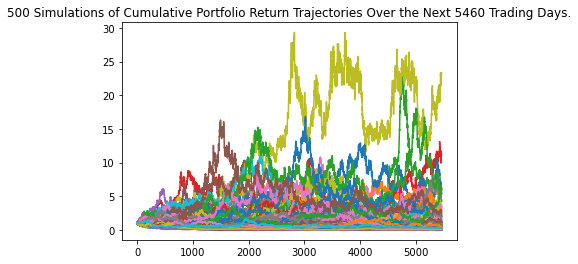

In [278]:
# Plot simulation outcomes
line_plot_ETH_15 = MC_ETH_sim15.plot_simulation()

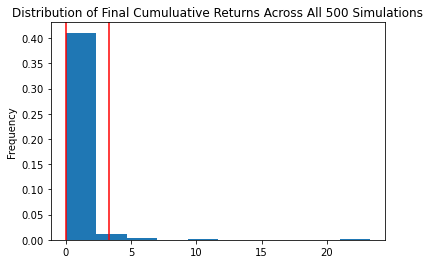

In [279]:
# Plot probability distribution and confidence intervals
dist_plot_ETH_15 = MC_ETH_sim15.plot_distribution()

In [280]:
# Get the summary statistics from the Monte Carlo simulation results for 15 years
ETH_table_15 = MC_ETH_sim15.summarize_cumulative_return()

# Print summary statistics
ETH_table_15

count           500.000000
mean              0.449889
std               1.403195
min               0.000833
25%               0.028148
50%               0.088818
75%               0.331009
max              23.316571
95% CI Lower      0.003077
95% CI Upper      3.310670
Name: 5460, dtype: float64

## Running Monte Carlo Simulation for 30 years on Ethereum

In [281]:
# Configuring a Monte Carlo simulation to forecast 30 years of Ethereum
MC_ETH_sim30 = MCSimulation(
    portfolio_data = df_ETH_data,
    #Distributing
    weights = [1],
    num_simulation = 500,
    num_trading_days = 364 * 30)

In [283]:
# Outputting the data
MC_ETH_sim30.portfolio_data.dropna().head()

ETH                                            
                            open    high      low close  volume daily_return
time                                                                        
2017-01-13 00:00:00-05:00  31.20  31.850  31.2000  31.7  191924     0.017657
2017-01-17 00:00:00-05:00  31.50  32.350  31.3500  32.0  195891     0.009464
2017-01-18 00:00:00-05:00  31.95  32.170  31.6917  32.0  226955     0.000000
2017-01-19 00:00:00-05:00  32.00  32.275  31.7500  32.1  368894     0.003125
2017-01-20 00:00:00-05:00  32.15  32.600  32.0500  32.3  233807     0.006231

In [284]:
# Running a Monte Carlo simulation
MC_ETH_sim30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.973271,1.013200,0.974559,1.062906,1.009631,1.025776,1.019760,0.999145,1.000870,1.040896,...,1.004168,1.000136,0.989077,1.030497,0.967573,0.990834,0.992525,1.029434,0.979494,0.995035
2,0.946145,1.008045,1.004370,1.047415,0.963799,1.049815,1.002658,1.020414,1.001981,0.995560,...,0.970698,0.993963,0.970342,1.066399,0.967252,0.959524,0.984307,1.021766,0.966510,1.013669
3,0.980369,1.031724,0.989651,1.072714,0.989710,1.050607,1.028701,1.024407,0.978287,1.000296,...,0.980979,1.005494,0.955380,1.063008,0.951839,0.976669,1.033036,1.021758,0.951316,0.997287
4,1.011211,1.029391,1.022014,1.045598,0.998374,1.057782,1.003058,1.019141,0.990045,1.001481,...,0.989346,1.028302,0.933378,1.116684,0.920067,0.942724,1.011521,1.010646,0.970124,1.025314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,0.022582,0.002110,0.004167,0.004659,0.004741,0.008928,0.005584,0.336905,0.000147,0.002356,...,0.006577,0.000069,0.890365,0.002272,0.051835,0.000152,0.000403,0.118162,0.038293,0.035280
10917,0.023343,0.002122,0.004237,0.004873,0.004873,0.008686,0.005652,0.331892,0.000146,0.002378,...,0.006638,0.000070,0.876402,0.002218,0.052405,0.000148,0.000387,0.119870,0.038136,0.035068
10918,0.023494,0.002155,0.004256,0.004882,0.004816,0.008856,0.005871,0.335181,0.000145,0.002381,...,0.006421,0.000069,0.885270,0.002319,0.053620,0.000146,0.000400,0.114245,0.037208,0.035971
10919,0.024072,0.002094,0.004269,0.004953,0.005029,0.009147,0.005886,0.341356,0.000138,0.002447,...,0.006237,0.000069,0.913459,0.002384,0.053618,0.000145,0.000396,0.111569,0.037983,0.034404


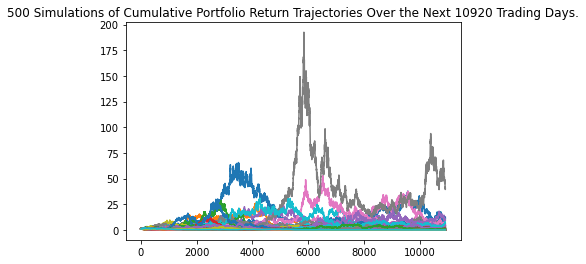

In [285]:
# Plot simulation outcomes
line_plot_ETH_30 = MC_ETH_sim30.plot_simulation()

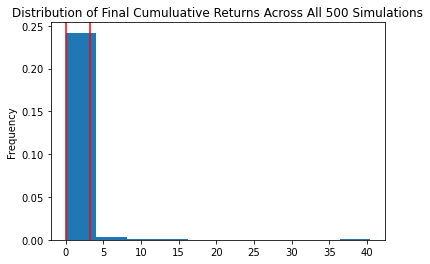

In [286]:
# Plot probability distribution and confidence intervals
dist_plot_ETH_30 = MC_ETH_sim30.plot_distribution()

In [287]:
# Get the summary statistics from the Monte Carlo simulation results for 30 years
ETH_table_30 = MC_ETH_sim30.summarize_cumulative_return()

# Print summary statistics
ETH_table_30

count           500.000000
mean              0.332335
std               2.142117
min               0.000008
25%               0.001613
50%               0.009109
75%               0.046774
max              40.442678
95% CI Lower      0.000074
95% CI Upper      3.163023
Name: 10920, dtype: float64

## Running Monte Carlo Simulation for 5 years on Portfolio

In [227]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_sim5 = MCSimulation(
    portfolio_data = df_coin_data,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 364 * 5)

In [228]:
# Outputting the data
MC_stock_sim5.portfolio_data.dropna().tail()

ATOM                                    \
                            open     high    low   close    volume   
time                                                                 
2020-12-24 00:00:00-05:00  13.74  14.5000  13.74  14.175  182438.0   
2020-12-28 00:00:00-05:00  14.09  15.3999  14.09  14.940  581686.0   
2020-12-29 00:00:00-05:00  15.46  15.5500  14.52  14.900  454944.0   
2020-12-30 00:00:00-05:00  15.10  16.5000  14.90  16.240  636768.0   
2020-12-31 00:00:00-05:00  16.42  16.5000  15.71  16.110  313368.0   

                                         LITE                         \
                          daily_return   open    high    low   close   
time                                                                   
2020-12-24 00:00:00-05:00     0.040749  98.00   98.94  97.65  98.255   
2020-12-28 00:00:00-05:00     0.053968  99.41  101.25  98.67  98.980   
2020-12-29 00:00:00-05:00    -0.002677  99.46  100.12  95.40  95.750   
2020-12-30 00:00:00-05:00     0.089933  95.42   96.67  94.52  95.120   
2020-12-31 00:00:00-05:00    -0.008005  95.11   95.50  94.34  94.860   

                                                     SOL                  \
                              volume daily_return   open   high      low   
time                                                                       
2020-12-24 00:00:00-05:00   461157.0     0.001274  10.00  10.58   9.6800   
2020-12-28 00:00:00-05:00   792624.0     0.007379  10.00  12.55   9.9300   
2020-12-29 00:00:00-05:00  1285022.0    -0.032633  11.15  12.70  10.3400   
2020-12-30 00:00:00-05:00   565143.0    -0.006580  12.50  13.20  11.5300   
2020-12-31 00:00:00-05:00   321101.0    -0.002733  11.68  12.15  11.1301   

                                                          
                           close     volume daily_return  
time                                                      
2020-12-24 00:00:00-05:00   9.70  3354049.0    -0.002058  
2020-12-28 00:00:00-05:00  12.48  9207771.0     0.286598  
2020-12-29 00:00:00-05:00  12.23  5893951.0    -0.020032  
2020-12-30 00:00:00-05:00  11.67  4054601.0    -0.045789  
2020-12-31 00:00:00-05:00  11.43  2548319.0    -0.020566

In [229]:
# Running a Monte Carlo simulation
MC_stock_sim5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978681,0.974916,1.027796,1.012045,0.982441,0.997573,0.998164,1.009959,1.003177,1.021490,...,1.026830,0.998961,0.979546,1.002704,1.034105,1.000854,1.032603,1.062524,1.029497,1.020220
2,0.966757,0.962091,0.992547,1.014968,1.013412,1.021060,0.994210,0.998507,0.989941,0.992010,...,1.031439,1.028319,0.944257,1.020791,0.984580,1.003943,1.086774,1.109979,1.047076,1.007055
3,0.945278,0.929293,1.000376,1.040757,0.998999,1.034100,1.016595,1.025114,0.993535,1.002240,...,1.020186,1.004180,0.947643,0.991879,1.017187,0.989362,1.089328,1.147971,0.973410,0.977888
4,0.980987,0.864291,0.959523,1.072474,0.987302,1.046041,1.011886,1.017499,1.023298,0.978348,...,1.052124,0.982619,0.999659,1.011991,1.050429,0.946920,1.104415,1.153393,0.919205,0.904658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,24.213194,9.839448,58.608158,98.083475,11.407344,24.748677,32.254181,87.486236,77.895772,23.259181,...,214.493569,302.126437,5.299403,40.015387,4.120380,34.661367,1.495670,5.484466,4.930576,7.326581
1817,24.129529,9.999771,57.849457,97.516155,11.491295,24.306792,31.076053,83.412705,77.088854,23.377176,...,228.392394,300.171023,5.269092,41.112579,4.069128,35.318728,1.428646,5.407387,4.948731,7.268765
1818,23.470523,9.909302,58.401920,100.442974,12.300269,23.992830,32.623307,87.231589,77.018088,22.840037,...,239.766368,325.775589,5.248897,42.282335,4.108979,34.980430,1.396635,5.413327,4.964704,7.444499
1819,23.144367,9.775186,57.536968,101.096013,12.313035,25.485060,32.325563,87.881928,76.063418,23.720051,...,239.521938,326.381959,5.085470,43.027389,4.081223,33.543823,1.438063,5.476756,5.036891,7.335533


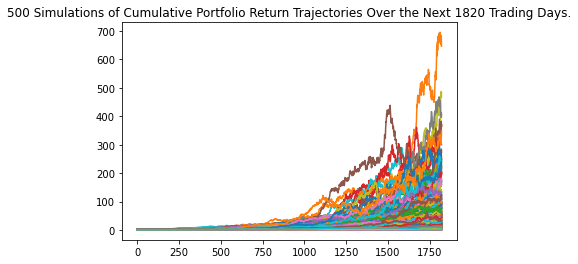

In [230]:
# Plot simulation outcomes
line_plot5 = MC_stock_sim5.plot_simulation()

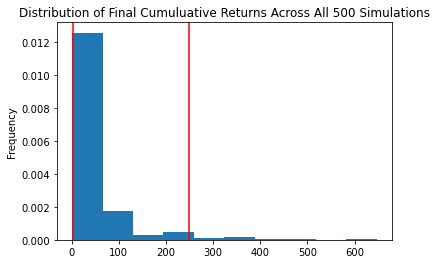

In [231]:
# Plot probability distribution and confidence intervals
dist_plot5 = MC_stock_sim5.plot_distribution()

In [232]:
# Get the summary statistics from the Monte Carlo simulation results for 5 years
table_5 = MC_stock_sim5.summarize_cumulative_return()

# Print summary statistics
table_5

count           500.000000
mean             47.136641
std              70.047894
min               0.806497
25%              12.032175
50%              23.026506
75%              49.180378
max             646.707750
95% CI Lower      2.922836
95% CI Upper    248.076631
Name: 1820, dtype: float64

## Running Monte Carlo Simulation for 10 years on Portfolio

In [233]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_sim10 = MCSimulation(
    portfolio_data = df_coin_data,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 364 * 10)

In [234]:
# Outputting the data
MC_stock_sim10.portfolio_data.dropna().tail()

ATOM                                    \
                            open     high    low   close    volume   
time                                                                 
2020-12-24 00:00:00-05:00  13.74  14.5000  13.74  14.175  182438.0   
2020-12-28 00:00:00-05:00  14.09  15.3999  14.09  14.940  581686.0   
2020-12-29 00:00:00-05:00  15.46  15.5500  14.52  14.900  454944.0   
2020-12-30 00:00:00-05:00  15.10  16.5000  14.90  16.240  636768.0   
2020-12-31 00:00:00-05:00  16.42  16.5000  15.71  16.110  313368.0   

                                         LITE                         \
                          daily_return   open    high    low   close   
time                                                                   
2020-12-24 00:00:00-05:00     0.040749  98.00   98.94  97.65  98.255   
2020-12-28 00:00:00-05:00     0.053968  99.41  101.25  98.67  98.980   
2020-12-29 00:00:00-05:00    -0.002677  99.46  100.12  95.40  95.750   
2020-12-30 00:00:00-05:00     0.089933  95.42   96.67  94.52  95.120   
2020-12-31 00:00:00-05:00    -0.008005  95.11   95.50  94.34  94.860   

                                                     SOL                  \
                              volume daily_return   open   high      low   
time                                                                       
2020-12-24 00:00:00-05:00   461157.0     0.001274  10.00  10.58   9.6800   
2020-12-28 00:00:00-05:00   792624.0     0.007379  10.00  12.55   9.9300   
2020-12-29 00:00:00-05:00  1285022.0    -0.032633  11.15  12.70  10.3400   
2020-12-30 00:00:00-05:00   565143.0    -0.006580  12.50  13.20  11.5300   
2020-12-31 00:00:00-05:00   321101.0    -0.002733  11.68  12.15  11.1301   

                                                          
                           close     volume daily_return  
time                                                      
2020-12-24 00:00:00-05:00   9.70  3354049.0    -0.002058  
2020-12-28 00:00:00-05:00  12.48  9207771.0     0.286598  
2020-12-29 00:00:00-05:00  12.23  5893951.0    -0.020032  
2020-12-30 00:00:00-05:00  11.67  4054601.0    -0.045789  
2020-12-31 00:00:00-05:00  11.43  2548319.0    -0.020566

In [235]:
# Running a Monte Carlo simulation
MC_stock_sim10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.023854,0.942601,1.009706,1.009972,1.015904,1.030998,1.007358,0.998016,1.012481,1.028751,...,1.035016,0.977553,0.990022,1.006921,0.983156,0.996542,1.004903,1.023866,1.051261,1.022744
2,0.995413,0.937345,1.026066,1.031440,1.009674,1.057964,1.035842,0.996516,1.057195,1.017020,...,1.050122,0.983793,1.004290,1.011103,0.990424,1.014987,1.053465,1.056039,1.066201,1.015741
3,0.962448,0.948268,1.022386,0.999551,0.984150,1.101386,1.003796,0.998788,1.083332,1.027870,...,1.077326,0.990902,1.000640,1.033474,0.969346,1.023544,1.040713,1.095586,1.100752,0.980418
4,0.988136,0.969516,1.013203,1.041145,0.990486,1.044586,1.042732,1.002313,1.130319,1.028004,...,1.145327,0.993169,1.029600,1.025926,0.964670,1.018142,1.013546,1.102325,1.128006,0.996621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,413.053082,334.253481,217.973481,5732.025466,782.090721,2527.198001,709.582414,3107.895811,1788.220896,392.018319,...,61.054198,2809.972849,179.140181,8.294336,1389.672749,321.476216,1037.736892,115.836120,160.671864,463.811538
3637,422.964233,322.131129,212.687370,5637.557138,789.032070,2500.667971,708.029571,2940.611260,1853.798050,411.401287,...,59.424399,2792.516141,178.390004,8.336574,1425.747606,308.531642,1020.532680,120.641144,157.096979,458.279326
3638,419.819681,327.918520,203.916470,5713.886271,797.349576,2447.158128,680.991569,3048.150922,1895.678146,420.625570,...,60.151438,2758.798722,175.571900,8.608980,1416.401598,320.972659,978.190792,125.419712,160.448257,471.618730
3639,436.494202,325.882391,208.394304,5613.543117,820.646103,2499.343703,681.337926,3105.405158,1850.472923,411.228152,...,59.860362,2742.671946,176.079223,8.281047,1436.216067,329.412741,975.870384,124.662125,159.395109,473.829950


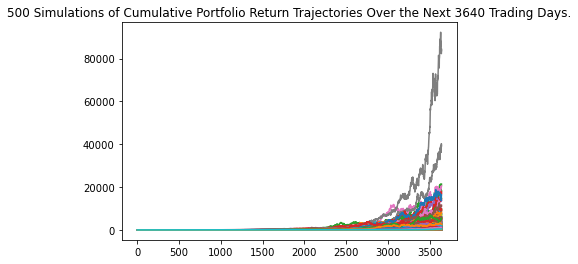

In [236]:
# Plot simulation outcomes
line_plot10 = MC_stock_sim10.plot_simulation()

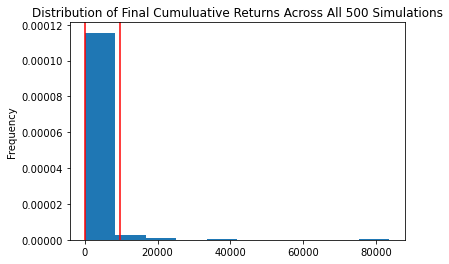

In [237]:
# Plot probability distribution and confidence intervals
dist_plot10 = MC_stock_sim10.plot_distribution()

In [238]:
# Get the summary statistics from the Monte Carlo simulation results for 10 years
table_10 = MC_stock_sim10.summarize_cumulative_return()

# Print summary statistics
table_10

count             500.000000
mean             1698.654378
std              4874.427409
min                 8.387940
25%               160.931698
50%               483.007846
75%              1538.032157
max             83635.252186
95% CI Lower       23.278491
95% CI Upper     9734.277492
Name: 3640, dtype: float64

## Running Monte Carlo Simulation for 15 years on Portfolio

In [242]:
# Configuring a Monte Carlo simulation to forecast 15 years cumulative returns
MC_stock_sim15 = MCSimulation(
    portfolio_data = df_coin_data,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 364 * 15)

In [243]:
# Outputting the data
MC_stock_sim15.portfolio_data.dropna().tail()

ATOM                                    \
                            open     high    low   close    volume   
time                                                                 
2020-12-24 00:00:00-05:00  13.74  14.5000  13.74  14.175  182438.0   
2020-12-28 00:00:00-05:00  14.09  15.3999  14.09  14.940  581686.0   
2020-12-29 00:00:00-05:00  15.46  15.5500  14.52  14.900  454944.0   
2020-12-30 00:00:00-05:00  15.10  16.5000  14.90  16.240  636768.0   
2020-12-31 00:00:00-05:00  16.42  16.5000  15.71  16.110  313368.0   

                                         LITE                         \
                          daily_return   open    high    low   close   
time                                                                   
2020-12-24 00:00:00-05:00     0.040749  98.00   98.94  97.65  98.255   
2020-12-28 00:00:00-05:00     0.053968  99.41  101.25  98.67  98.980   
2020-12-29 00:00:00-05:00    -0.002677  99.46  100.12  95.40  95.750   
2020-12-30 00:00:00-05:00     0.089933  95.42   96.67  94.52  95.120   
2020-12-31 00:00:00-05:00    -0.008005  95.11   95.50  94.34  94.860   

                                                     SOL                  \
                              volume daily_return   open   high      low   
time                                                                       
2020-12-24 00:00:00-05:00   461157.0     0.001274  10.00  10.58   9.6800   
2020-12-28 00:00:00-05:00   792624.0     0.007379  10.00  12.55   9.9300   
2020-12-29 00:00:00-05:00  1285022.0    -0.032633  11.15  12.70  10.3400   
2020-12-30 00:00:00-05:00   565143.0    -0.006580  12.50  13.20  11.5300   
2020-12-31 00:00:00-05:00   321101.0    -0.002733  11.68  12.15  11.1301   

                                                          
                           close     volume daily_return  
time                                                      
2020-12-24 00:00:00-05:00   9.70  3354049.0    -0.002058  
2020-12-28 00:00:00-05:00  12.48  9207771.0     0.286598  
2020-12-29 00:00:00-05:00  12.23  5893951.0    -0.020032  
2020-12-30 00:00:00-05:00  11.67  4054601.0    -0.045789  
2020-12-31 00:00:00-05:00  11.43  2548319.0    -0.020566

In [244]:
# Running a Monte Carlo simulation
MC_stock_sim15.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009764,0.981172,0.989372,0.997092,0.997633,1.043976,0.973529,1.061554,1.025723,1.022951,...,1.052216,0.982728,0.969905,1.004867,1.000568,1.003197,0.975408,1.008524,0.953176,0.987350
2,1.049871,0.991222,0.993409,0.990045,0.974857,1.044145,0.965012,1.083792,1.010549,1.031384,...,1.055303,0.977879,0.972900,1.028010,1.019478,1.018716,0.926724,0.980963,0.906023,1.001649
3,1.032990,0.990878,0.983678,0.975327,1.004818,1.027866,0.941422,1.092572,1.012335,1.021559,...,1.050432,0.947676,0.984231,1.024919,1.026910,1.032060,0.927884,0.988209,0.894789,1.062147
4,1.056938,0.993609,0.998381,0.943596,1.029003,1.055266,0.924219,1.063911,0.984604,1.019499,...,1.040943,0.975909,1.013729,1.034170,0.984379,1.020056,0.947685,0.998281,0.911374,1.086123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,355.554887,12165.229032,3358.849803,1280.822070,617.765727,350268.354511,222811.649689,121975.915870,10587.898236,170563.642130,...,3454.988893,11019.935081,95987.464070,10704.705865,626.378336,3317.748568,111536.481628,1180.123562,48642.672351,143290.355243
5457,358.949582,12077.109185,3357.118993,1273.865892,621.582249,352112.963670,221613.969355,117115.488315,10872.400374,170511.283714,...,3586.182463,11168.351980,96282.658782,10708.058760,600.288091,3363.837660,114102.090007,1203.514469,46895.691741,143299.761514
5458,370.547274,11915.409473,3355.969266,1283.062615,608.813328,345336.300256,222968.934441,121876.044703,10779.177602,170324.992029,...,3688.338100,11161.270548,98462.546960,11425.032947,615.288644,3399.838458,117214.171590,1216.291728,45991.868879,140322.355166
5459,384.805689,11650.633102,3282.348200,1246.510789,606.092094,335228.150618,224177.534946,121683.220248,10602.337338,178984.776459,...,3563.759746,10660.583762,97281.225380,11671.800442,625.341414,3495.174488,118412.418140,1226.663828,45944.701336,140287.170145


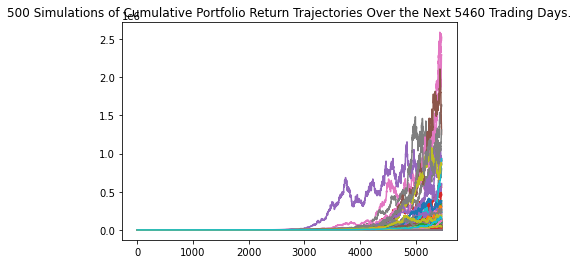

In [245]:
# Plot simulation outcomes
line_plot15 = MC_stock_sim15.plot_simulation()

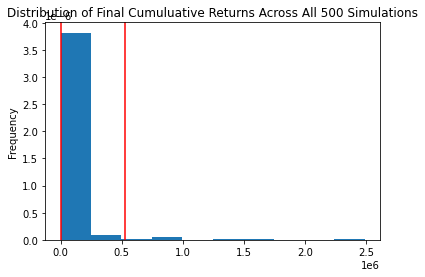

In [246]:
# Plot probability distribution and confidence intervals
dist_plot15 = MC_stock_sim15.plot_distribution()

In [247]:
# Get the summary statistics from the Monte Carlo simulation results for 15 years
table_15 = MC_stock_sim15.summarize_cumulative_return()

# Print summary statistics
table_15

count           5.000000e+02
mean            6.758131e+04
std             2.156042e+05
min             6.276402e+01
25%             3.613356e+03
50%             1.336443e+04
75%             4.548950e+04
max             2.489048e+06
95% CI Lower    2.987049e+02
95% CI Upper    5.250274e+05
Name: 5460, dtype: float64

## Running Monte Carlo Simulation for 30 years on Portfolio

In [248]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_sim30 = MCSimulation(
    portfolio_data = df_coin_data,
    weights = [.34,.33,.33],
    num_simulation = 500,
    num_trading_days = 364 * 30)

In [249]:
# Outputting the data
MC_stock_sim30.portfolio_data.dropna().tail()

ATOM                                    \
                            open     high    low   close    volume   
time                                                                 
2020-12-24 00:00:00-05:00  13.74  14.5000  13.74  14.175  182438.0   
2020-12-28 00:00:00-05:00  14.09  15.3999  14.09  14.940  581686.0   
2020-12-29 00:00:00-05:00  15.46  15.5500  14.52  14.900  454944.0   
2020-12-30 00:00:00-05:00  15.10  16.5000  14.90  16.240  636768.0   
2020-12-31 00:00:00-05:00  16.42  16.5000  15.71  16.110  313368.0   

                                         LITE                         \
                          daily_return   open    high    low   close   
time                                                                   
2020-12-24 00:00:00-05:00     0.040749  98.00   98.94  97.65  98.255   
2020-12-28 00:00:00-05:00     0.053968  99.41  101.25  98.67  98.980   
2020-12-29 00:00:00-05:00    -0.002677  99.46  100.12  95.40  95.750   
2020-12-30 00:00:00-05:00     0.089933  95.42   96.67  94.52  95.120   
2020-12-31 00:00:00-05:00    -0.008005  95.11   95.50  94.34  94.860   

                                                     SOL                  \
                              volume daily_return   open   high      low   
time                                                                       
2020-12-24 00:00:00-05:00   461157.0     0.001274  10.00  10.58   9.6800   
2020-12-28 00:00:00-05:00   792624.0     0.007379  10.00  12.55   9.9300   
2020-12-29 00:00:00-05:00  1285022.0    -0.032633  11.15  12.70  10.3400   
2020-12-30 00:00:00-05:00   565143.0    -0.006580  12.50  13.20  11.5300   
2020-12-31 00:00:00-05:00   321101.0    -0.002733  11.68  12.15  11.1301   

                                                          
                           close     volume daily_return  
time                                                      
2020-12-24 00:00:00-05:00   9.70  3354049.0    -0.002058  
2020-12-28 00:00:00-05:00  12.48  9207771.0     0.286598  
2020-12-29 00:00:00-05:00  12.23  5893951.0    -0.020032  
2020-12-30 00:00:00-05:00  11.67  4054601.0    -0.045789  
2020-12-31 00:00:00-05:00  11.43  2548319.0    -0.020566

In [250]:
# Running a Monte Carlo simulation
MC_stock_sim30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danie\desktop\dadene\MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.000307e+00,9.857053e-01,1.062168,1.005797e+00,9.720493e-01,9.655933e-01,9.990370e-01,1.052826e+00,9.870808e-01,9.964972e-01,...,1.010956e+00,1.031261e+00,9.806140e-01,9.601045e-01,1.010328e+00,9.727361e-01,9.595916e-01,9.862490e-01,9.707772e-01,1.003537e+00
2,9.929863e-01,9.426053e-01,1.072929,1.001207e+00,9.691713e-01,9.614825e-01,1.006023e+00,1.050834e+00,9.737670e-01,1.024137e+00,...,1.022279e+00,1.081378e+00,9.624258e-01,9.445399e-01,1.027589e+00,9.794811e-01,9.871695e-01,1.018338e+00,1.009423e+00,1.032839e+00
3,9.892435e-01,9.383988e-01,1.090953,1.035573e+00,9.493199e-01,9.372861e-01,1.018646e+00,1.093144e+00,9.760789e-01,1.019262e+00,...,1.027615e+00,1.075968e+00,1.006754e+00,9.408682e-01,1.056615e+00,9.609140e-01,9.922573e-01,1.026879e+00,1.026109e+00,1.010965e+00
4,1.007440e+00,8.966133e-01,1.096084,1.027014e+00,9.509634e-01,9.566455e-01,1.017045e+00,1.070943e+00,9.485579e-01,9.909542e-01,...,1.081808e+00,1.077187e+00,1.039754e+00,9.241395e-01,1.046259e+00,9.470229e-01,1.061650e+00,1.023684e+00,1.014153e+00,9.906411e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,2.447309e+08,8.369479e+07,529519.327491,1.105273e+07,1.747607e+09,1.458188e+07,4.167084e+08,1.455239e+07,2.078642e+08,1.368250e+08,...,2.183104e+08,9.910910e+08,1.995927e+10,2.279979e+07,3.469891e+08,8.260224e+07,5.348754e+10,1.342615e+09,1.449451e+08,2.888802e+10
10917,2.344359e+08,8.348364e+07,514015.554214,1.090782e+07,1.753804e+09,1.492032e+07,4.081510e+08,1.456727e+07,2.039592e+08,1.381011e+08,...,2.187301e+08,1.008037e+09,1.998442e+10,2.234077e+07,3.533704e+08,8.301282e+07,5.317866e+10,1.294931e+09,1.439274e+08,2.939227e+10
10918,2.303323e+08,8.670171e+07,519891.750102,1.107862e+07,1.770913e+09,1.495847e+07,3.914787e+08,1.484074e+07,2.074821e+08,1.432263e+08,...,2.212446e+08,9.820713e+08,1.923629e+10,2.239354e+07,3.304115e+08,8.756665e+07,5.436893e+10,1.320154e+09,1.477578e+08,2.977801e+10
10919,2.487425e+08,8.769255e+07,519292.760728,1.131336e+07,1.687209e+09,1.532463e+07,4.001790e+08,1.523218e+07,2.066542e+08,1.499388e+08,...,2.199554e+08,9.455820e+08,1.951595e+10,2.309873e+07,3.290622e+08,8.622125e+07,5.435145e+10,1.368261e+09,1.575870e+08,3.000954e+10


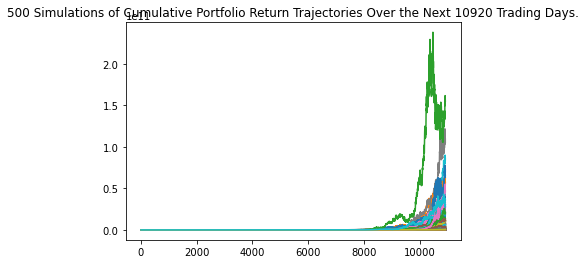

In [251]:
# Plot simulation outcomes
line_plot30 = MC_stock_sim30.plot_simulation()

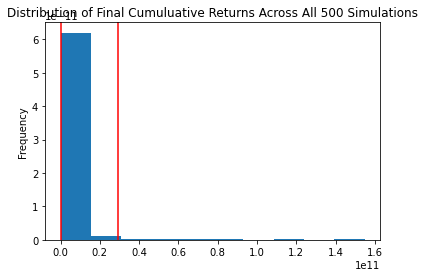

In [252]:
# Plot probability distribution and confidence intervals
dist_plot30 = MC_stock_sim30.plot_distribution()

In [253]:
# Get the summary statistics from the Monte Carlo simulation results for 30 years
table_30 = MC_stock_sim30.summarize_cumulative_return()

# Print summary statistics
table_30

count           5.000000e+02
mean            2.971783e+09
std             1.194425e+10
min             2.863632e+04
25%             2.185367e+07
50%             1.445812e+08
75%             1.093258e+09
max             1.548955e+11
95% CI Lower    2.458227e+05
95% CI Upper    2.905889e+10
Name: 10920, dtype: float64

## Portfolio vs. Ethereum: Monte Carlo Simulation Results for 5 Years

In [254]:
# Set initial investment portfolio(5 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_five = round(table_5[8]*10000,2)
ci_upper_five = round(table_5[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $29228.36 and $2480766.31


In [288]:
# Set initial investment ethereum(5 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_five = round(ETH_table_5[8]*10000,2)
ci_upper_five = round(ETH_table_5[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $517.73 and $35341.56


## Portfolio vs. Ethereum: Monte Carlo Simulation Results for 10 Years

In [255]:
# Set initial investment portfolio(10 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_ten = round(table_10[8]*10000,2)
ci_upper_ten = round(table_10[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 10 years will end within in the range of $232784.91 and $97342774.92


In [294]:
# Set initial investment ethereum(10 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_five = round(ETH_table_10[8]*10000,2)
ci_upper_five = round(ETH_table_10[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 10 years will end within in the range of $114.21 and $30899.62


## Portfolio vs. Ethereum: Monte Carlo Simulation Results for 15 Years

In [256]:
# Set initial investment portfolio(15 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_fifteen = round(table_15[8]*10000,2)
ci_upper_fifteen = round(table_15[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_lower_fifteen} and ${ci_upper_fifteen}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 15 years will end within in the range of $2987049.46 and $5250274078.95


In [293]:
# Set initial investment ethereum(15 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_five = round(ETH_table_15[8]*10000,2)
ci_upper_five = round(ETH_table_15[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 15 years will end within in the range of $30.77 and $33106.7


## Portfolio vs. Ethereum: Monte Carlo Simulation Results for 30 Years

In [257]:
# Set initial investment portfolio(30 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_thirty = round(table_30[8]*10000,2)
ci_upper_thirty = round(table_30[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 30 years will end within in the range of $2458226777.15 and $290588938879134.2


In [292]:
# Set initial investment ethereum(30 years)
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower_five = round(ETH_table_30[8]*10000,2)
ci_upper_five = round(ETH_table_30[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 30 years will end within in the range of $0.74 and $31630.23


## Interpretation of Monte Carlo Simluation Results

#### Astonishingly, the simulation shows that over the next 30 years Ethereum is going to move from being a safe investment to a risky one. As the years go on, the spread widens between them. There are many factors that could contribute to this from a better version of Ethereum being created to a cryptomarket crash to something as crazy as aliens invading Earth. On the other hand, the portfolio of Cosmos, Litecoin, and Solana shows that even though the spread is wide your 10,000 dollar investment will eventually make you richer  than Bezos and Musk combined. Insane! So based upon this simulation, these three coins are very much worth investing in, beyond sustainable in the market, and outperform Ethereum tremendously. Unfortunately we were not able to pull Bitcoin data from Alpaca for this but given how similar the current trend is between them, I believe it would follow the same suit as shown here for Ethereum. 